# Выщелачивание минерала

In [51]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as ipy

## Растворение одной соли (10.2.1)

In [52]:
# set up parameters
zones_number = 3 # number of zones
number_comp = 2 # number of components in both water and rock
c_ini = 0.1 # initial concentrations of mineral in water
c_bound = 0.3 # boundary concentration of minral in water
n_ini = 0.2 #initial concentration of mineral in rock
c_m = 0.5
#c_m = c_bound+n_ini# concentratopn of mineral in equlibrium with boundary solution
v = 0.3#  darcy velocity
n = 0.3 #porosity 
u = np.zeros((1, zones_number-1))
xx = np.zeros((1, zones_number-1))
forybound = [c_ini,c_bound,c_bound,n_ini,c_m]
variables = ['v','c_ini','c_bound','n_ini','c_m','n']

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
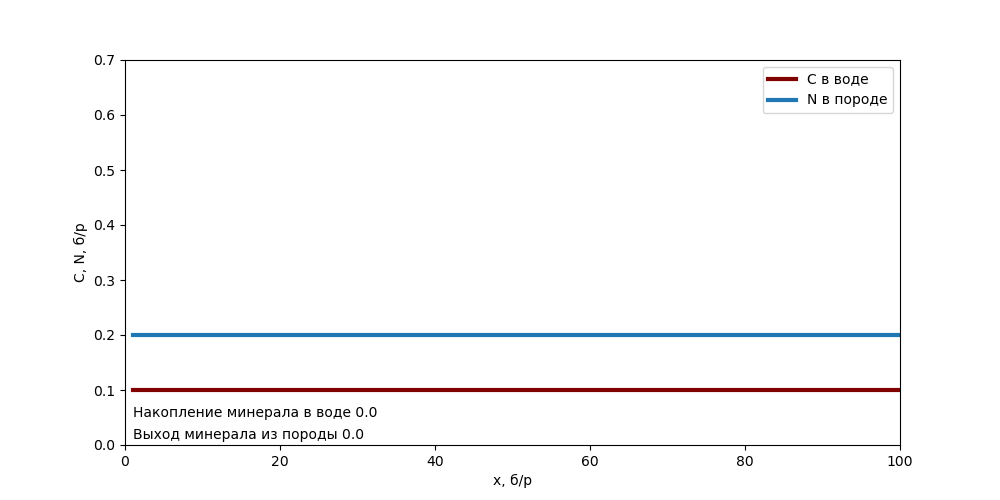

In [91]:
#u = v/n # tranport velocity calculation
# tranport velocitites calculation
u[0,0] = (v/n)/(1+(n_ini/(c_m-c_bound)))# frount 12
u[0,1]  = v/n # front 23
time = np.arange(1,101)
x = np.arange(1,101)
conc1 = np.zeros((number_comp, x.size))# initiate concentration matrix

def transport(t, conc,v,c_ini,c_bound,n_ini,c_m,n):# v,c_ini,c_bound,n_ini,c_m,n ):
        it = np.nditer(u, flags=['f_index'])
        u[0,0] = (v/n)/(1+(n_ini/(c_m-c_bound)))# frount 12
        u[0,1]  = v/n # front 23
        for uu in it:
            xx[0,it.index] = t*uu
        
        conc[0,0:int(np.round(xx[0,0]))] = c_bound
        conc[0,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] = c_m
        conc[0,int(np.round(xx[0,1])):] = c_ini
        #########################################
        conc[1,0:int(np.round(xx[0,0]))] = 0
        conc[1,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] = n_ini
        conc[1,int(np.round(xx[0,1])):] = n_ini
        return conc, xx


#tt = 10
fig1 = plt.figure(figsize=(10, 5))
ax = fig1.add_subplot(1, 1, 1)
#transport(0,conc1,,v,c_ini,c_bound,n_ini,c_m,n)
line, = ax.plot(x, transport(0,conc1,v,c_ini,c_bound,n_ini,c_m,n)[0][0,], label = 'C в воде', linewidth = 3, color = "maroon")
line1, = ax.plot(x, transport(0,conc1,v,c_ini,c_bound,n_ini,c_m,n)[0][1,],label = 'N в породе', linewidth = 3,color = "tab:blue")
ann = ax.annotate("Выход минерала из породы "+str(xx[0,0]*n_ini), (1, 0.01))
ann1 = ax.annotate("Накопление минерала в воде "+str((xx[0,1]-xx[0,0])*(c_m-c_ini)), (1, 0.05))
out = ipy.Output()
ax.set_xlim([0,conc1[1,].size])
ax.set_ylim([0, max(forybound)+0.1])
ax.set_ylabel('C, N, б/р')
ax.set_xlabel('x, б/р')
plt.legend()
def update(time, v,c_ini,c_bound,n_ini,c_m,n):
    with out:
#        transport(tt,conc1)

        sliders_values_num = [slider_v.value,slider_c_ini.value,slider_c_bound.value,slider_n_ini.value,slider_c_m.value,slider_n.value]
        line.set_data(x, transport(slider.value,conc1,*sliders_values_num)[0][0,])
        line1.set_data(x, transport(slider.value,conc1,*sliders_values_num)[0][1,])
        ann.set_text("Выход минерала из породы "+str(np.round(transport(slider.value,conc1,*sliders_values_num)[1][0,0]*n_ini)))
        ann1.set_text("Накопление минерала в воде "+str(np.round((transport(slider.value,conc1,*sliders_values_num)[1][0,1]-transport(slider.value,conc1,*sliders_values_num)[1][0,0])*(c_m-c_bound))))
        ax.set_ylim([0, max(*sliders_values_num[1:-1])+0.1])
        fig1.canvas.draw_idle()
    

slider = ipy.IntSlider(min = 0, max = 100)
slider_v = ipy.FloatSlider(min = 0, max = 3, step = 0.1, value=0.3)
slider_n_ini = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.2)
slider_c_ini = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.1)
slider_c_bound = ipy.FloatSlider(min = 0, max = 0.45, step = 0.05, value=0.3)
slider_c_m= ipy.FloatSlider(min = 0.5, max = 1, step = 0.05, value=0.5)
slider_n= ipy.FloatSlider(min = 0.05, max = 1, step = 0.05, value=0.3)
widget = ipy.interactive(update, time = slider, v = slider_v,c_ini=slider_c_ini,c_bound=slider_c_bound,n_ini=slider_n_ini,c_m=slider_c_m,n=slider_n)
# sliders= ["slider_v","slider_c_ini","slider_c_bound","slider_n_ini","slider_c_m","slider_n"]
# sliders_values = [slider+'.value' for slider in sliders]

#widget = ipy.interactive(update, )
layout = ipy.Layout(
     display = 'flex',
                    flex_flow = 'column',
#                    justify_content = 'space-between',
#                    align_items = 'center',
                   )
widgets = ipy.HBox(children=(slider, out,slider_v,slider_n,slider_c_ini,slider_c_bound,slider_n_ini,slider_c_m), layout = layout)
display(widgets)

In [ ]:
#plt.close('all')

## Метасоматическое замещение минералов (11.2.2)

In [57]:
# set up parameters
zones_number = 4 # number of zones
number_comp = 4 # number of components in both water and rock
G_ini = 0.05 # initial concentrations of gypsum in water
G_bound = 0.1 # boundary concentration of gypsum in water
#g_ini = 0.2 #initial concentration of gypsum in rock
G_m = 0.2 #
A_bound = 0.6 # boundary acid concentration
A_m = 0.4 # acid eq conc with calcite
A_ini  = 0.05
q_ini = 0.6  # calcite ini conc
forybound = [v, q_ini,A_ini,A_m,A_bound,G_m,G_bound,G_ini,n]
#c_m = c_bound+n_ini# concentratopn of mineral in equlibrium with boundary solution
v = 0.3#  darcy velocity
n = 0.3 #porosity 
u = np.zeros((1, zones_number-1))
xx = np.zeros((1, zones_number-1))
uuu = v/n #transport velocity

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
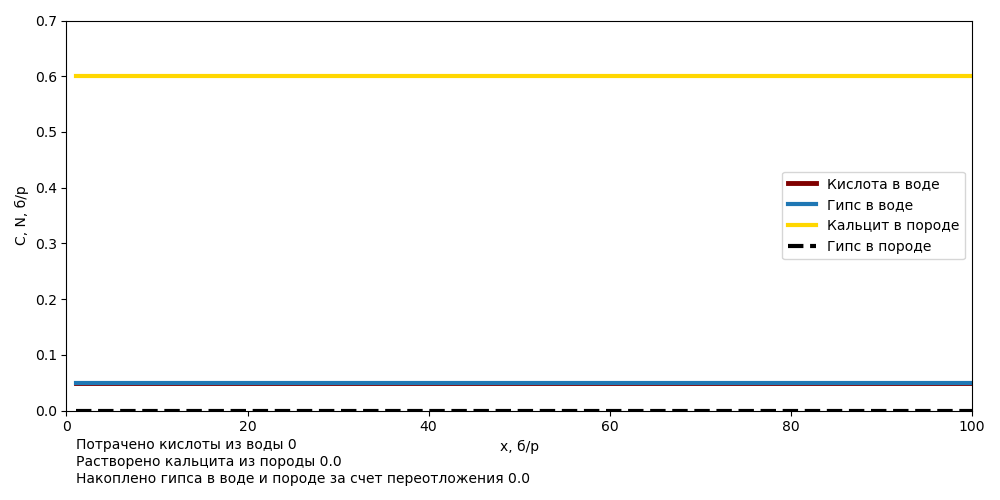

In [93]:
u[0,0] = uuu/(1+(q_ini/(G_m-G_bound)))
u[0,1] = (uuu)/(1+(q_ini/(A_bound-A_m)))# frount 12
u[0,2]  = uuu  # front 23
time = np.arange(1,101)
x = np.arange(1,101)
conc1 = np.zeros((number_comp, x.size))# initiate concentration matrix

def transport1(t, conc,v, q_ini,A_ini,A_bound,A_m,G_m,G_bound,G_ini,n):
        it = np.nditer(u, flags=['f_index'])
        uuu = v/n 
        u[0,0] = uuu/(1+(q_ini/(G_m-G_bound)))
        u[0,1] = (uuu)/(1+(q_ini/(A_bound-A_m)))# frount 12
        u[0,2]  = uuu  # front 23
        for uu in it:
            xx[0,it.index] = t*uu
       ##########################################Кислота
        conc[0,0:int(np.round(xx[0,0]))] = A_bound
        conc[0,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  A_bound
        conc[0,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = A_m
        conc[0,int(np.round(xx[0,2])):] = A_ini
        #########################################Гипс растворенный
        conc[1,0:int(np.round(xx[0,0]))] = G_bound
        conc[1,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  G_m
        conc[1,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = G_m
        conc[1,int(np.round(xx[0,2])):] = G_ini
        ##########################################Кальцит
        conc[2,0:int(np.round(xx[0,0]))] = 0
        conc[2,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  0
        conc[2,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = q_ini
        conc[2,int(np.round(xx[0,2])):] = q_ini
        ######################################### Гипс в пооде
        conc[3,0:int(np.round(xx[0,0]))] = 0
        conc[3,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  q_ini
        conc[3,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] =0
        conc[3,int(np.round(xx[0,2])):] = 0
        return conc, xx
fig = plt.figure(figsize=(10, 5))
ax4 = fig.add_subplot(1, 1, 1)
#transport(0,conc1)
line4, = ax4.plot(x, transport1(0,conc1,*forybound)[0][0,], label = 'Кислота в воде', linewidth = 3.5, color = "maroon")
line5, = ax4.plot(x, transport1(0,conc1,*forybound)[0][1,],label = 'Гипс в воде', linewidth = 3,color = "tab:blue")
line6, = ax4.plot(x, transport1(0,conc1,*forybound)[0][2,], label = 'Кальцит в породе', linewidth = 3, color = "gold")
line7, = ax4.plot(x, transport1(0,conc1,*forybound)[0][3,],'--',label = 'Гипс в породе', linewidth = 3,color = "black")
ann = ax4.annotate("Потрачено кислоты из воды "+str(0), (1, -0.07),annotation_clip=False)# неправильно, лень переделывать
ann1 = ax4.annotate("Растворено кальцита из породы "+str((0)*(c_m-c_ini)), (1, -0.1),annotation_clip=False,)
ann2 = ax4.annotate("Накоплено гипса в воде и породе за счет переотложения "+str((0)*(c_m-c_ini)), (1, -0.13),annotation_clip=False)
out = ipy.Output()
ax4.set_xlim([0,conc1[1,].size])
ax4.set_ylim([0, max(forybound)+0.1])
ax4.set_ylabel('C, N, б/р')
ax4.set_xlabel('x, б/р')
plt.legend()#loc='center left',bbox_to_anchor=(1,0))
plt.tight_layout()
def update1(time,v, q_ini,A_ini,A_m,A_bound,G_m,G_bound,G_ini,n):
    with out:
#        transport(tt,conc1)
        sliders_values_num_ = [slider_v_.value,slider_q_ini.value,slider_A_ini.value,slider_A_bound.value,slider_A_m.value,slider_G_m.value,slider_G_bound.value,slider_G_ini.value,slider_n_.value]
        line4.set_data(x, transport1(sliderrr.value,conc1,*sliders_values_num_)[0][0,])
        line5.set_data(x, transport1(sliderrr.value,conc1,*sliders_values_num_)[0][1,])
        line6.set_data(x, transport1(sliderrr.value,conc1,*sliders_values_num_)[0][2,])
        line7.set_data(x, transport1(sliderrr.value,conc1,*sliders_values_num_)[0][3,])
        ann.set_text("Потрачено кислоты из воды "+str(np.round((transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,2]-transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,1])*(A_bound-A_m))))
        ann1.set_text("Растворено кальцита из породы "+str(np.round((transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,1])*(q_ini))))
        ann2.set_text("Накоплено гипса в воде и породе за счет переотложения "+str(np.round((transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,1]-transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,0])*(q_ini)+(G_m-G_bound)*(transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,2]-transport1(sliderrr.value,conc1,*sliders_values_num_)[1][0,0]))))
        ax4.set_ylim([0, max(*sliders_values_num_[1:-1])+0.1])   
        fig.canvas.draw_idle()
        

sliderrr = ipy.IntSlider(min = 0, max = 100)
slider_v_ = ipy.FloatSlider(min = 0, max = 3, step = 0.1, value=0.3)
slider_q_ini = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.2)
slider_A_ini = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.1)
slider_A_bound = ipy.FloatSlider(min = 0.5, max = 1, step = 0.05, value=0.3)
slider_A_m= ipy.FloatSlider(min = 0.05, max = 0.45, step = 0.05, value=0.5)
slider_G_m= ipy.FloatSlider(min = 0.5, max = 1, step = 0.05, value=0.5)
slider_G_bound= ipy.FloatSlider(min = 0, max = 0.45, step = 0.05, value=0.5)
slider_G_ini = ipy.FloatSlider(min = 0, max = 0.45, step = 0.05, value=0.3)
slider_n_= ipy.FloatSlider(min = 0.05, max = 1, step = 0.05, value=0.3)
widget = ipy.interactive(update1, time = sliderrr,v = slider_v_,q_ini=slider_q_ini,A_ini=slider_A_ini ,A_bound=slider_A_bound,A_m=slider_A_m,G_m=slider_G_m,G_bound=slider_G_bound,G_ini=slider_G_ini ,n=slider_n_)
layout = ipy.Layout(
     display = 'flex',
                    flex_flow = 'column',
#                    justify_content = 'space-between',
#                    align_items = 'center',
                   )
widgets = ipy.HBox(children=(sliderrr, out,slider_v_, slider_q_ini, slider_A_ini, slider_A_bound, slider_A_m, slider_G_m, slider_G_bound, slider_G_ini, slider_n_), layout = layout)
display(widgets)


In [ ]:
#plt.close('all')